In [1]:
# Usefull libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data

data = pd.read_csv("sales_data.csv")


In [6]:
# Data overview

data.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [8]:
#Check for Duplication

data.nunique()

Order Date          142395
Order ID            178437
Product                 19
Product_ean         185950
catégorie                4
Purchase Address    140787
Quantity Ordered         9
Price Each              17
Cost price              17
turnover                53
margin                  54
dtype: int64

In [9]:
# Check for missing values

data.isnull().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [10]:
# statistics

data.describe()

,Order ID,Product_ean,Quantity Ordered,Price Each,Cost price,turnover,margin
count,185950.000000,1.859500e+05,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,5.509211e+12,1.124383,184.399735,69.668583,185.490917,115.289422
std,51512.737110,2.598403e+12,0.442793,332.731330,109.424191,332.919771,225.227190
min,141234.000000,1.000083e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,185831.250000,3.254280e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,230367.500000,5.511235e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,275035.750000,7.765195e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,319670.000000,9.999983e+12,9.000000,1700.000000,561.000000,3400.000000,2278.000000


In [11]:
# drop Order ID and product_ean columns

data.drop(columns={'Order ID','Product_ean'},inplace=True)

In [12]:
data

,Order Date,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,iPhone,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,Lightning Charging Cable,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,Wired Headphones,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,27in FHD Monitor,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,Wired Headphones,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...
185945,2019-12-11 20:58:00,Lightning Charging Cable,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185946,2019-12-01 12:01:00,AA Batteries (4-pack),Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185947,2019-12-09 06:43:00,Vareebadd Phone,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185948,2019-12-03 10:39:00,Wired Headphones,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


In [ ]:
# Order Date will be splitted into columns Year and month and then dropped

In [14]:
data['Order Year']=data['Order Date'].str.split(' ').str[0].str.split('-').str[0]
data['Order Month']=data['Order Date'].str.split(' ').str[0].str.split('-').str[1]


In [16]:
data.drop(columns={'Order Date'},inplace=True)

In [17]:
data

,Product,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month
0,iPhone,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,2019,01
1,Lightning Charging Cable,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,2019,01
2,Wired Headphones,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,2019,01
3,27in FHD Monitor,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,2019,01
4,Wired Headphones,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,2019,01
...,...,...,...,...,...,...,...,...,...,...
185945,Lightning Charging Cable,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750,2019,12
185946,AA Batteries (4-pack),Électronique,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400,2019,12
185947,Vareebadd Phone,Alimentation,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000,2019,12
185948,Wired Headphones,Alimentation,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950,2019,12


In [ ]:
# Also we don't need exact address , just city and state 

In [22]:
data['Purchase City'] = data['Purchase Address'].str.split(',').str[1]

In [24]:
data['Purchase State'] = data['Purchase Address'].str.split(',').str[2]

In [31]:
data['Purchase State'] = data['Purchase State'].str.split(' ').str[1]

In [33]:
data.drop(columns={'Purchase Address'},inplace=True)

In [34]:
data

,Product,catégorie,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City,Purchase State
0,iPhone,Vêtements,1,700.00,231.0000,700.00,469.0000,2019,01,Boston,MA
1,Lightning Charging Cable,Alimentation,1,14.95,7.4750,14.95,7.4750,2019,01,Portland,OR
2,Wired Headphones,Vêtements,2,11.99,5.9950,23.98,11.9900,2019,01,San Francisco,CA
3,27in FHD Monitor,Sports,1,149.99,97.4935,149.99,52.4965,2019,01,Los Angeles,CA
4,Wired Headphones,Électronique,1,11.99,5.9950,11.99,5.9950,2019,01,Austin,TX
...,...,...,...,...,...,...,...,...,...,...,...
185945,Lightning Charging Cable,Électronique,1,14.95,7.4750,14.95,7.4750,2019,12,San Francisco,CA
185946,AA Batteries (4-pack),Électronique,2,3.84,1.9200,7.68,3.8400,2019,12,Los Angeles,CA
185947,Vareebadd Phone,Alimentation,1,400.00,132.0000,400.00,268.0000,2019,12,Seattle,WA
185948,Wired Headphones,Alimentation,1,11.99,5.9950,11.99,5.9950,2019,12,Dallas,TX


In [38]:
# Check adjusted data

data.nunique()

Product             19
catégorie            4
Quantity Ordered     9
Price Each          17
Cost price          17
turnover            53
margin              54
Order Year           2
Order Month         12
Purchase City        9
Purchase State       8
dtype: int64

In [39]:
data.isnull().sum()

Product             0
catégorie           0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
Order Year          0
Order Month         0
Purchase City       0
Purchase State      0
dtype: int64

In [44]:
# Most selling products

data['Product'].value_counts().to_frame()

,count
Product,
USB-C Charging Cable,21903
Lightning Charging Cable,21658
AAA Batteries (4-pack),20641
AA Batteries (4-pack),20577
Wired Headphones,18882
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
27in FHD Monitor,7507
iPhone,6842


In [46]:
#same as change fature data french to english for better understanding
data_mapping = {
    'Vêtements': 'Clothes',
    'Électronique': 'Electronics'
}
data['catégorie'] = data['catégorie'].map(data_mapping).fillna(data['catégorie'])
data.rename(columns={"catégorie": "Category"}, inplace=True)

In [68]:
# Better replace the Category column with pre-specified values with these lists



con_elec = ['20in Monitor', 
         '27in 4K Gaming Monitor', 
         '27in FHD Monitor', 
         '34in Ultrawide Monitor', 
         'Flatscreen TV', 
         'Google Phone', 
         'Macbook Pro Laptop', 
         'ThinkPad Laptop', 
         'Vareebadd Phone', 
         'iPhone']
elec_acc = ['AA Batteries (4-pack)',
            'AAA Batteries (4-pack)', 
            'Apple Airpods Headphones',
            'Bose SoundSport Headphones',
            'Lightning Charging Cable',
            'USB-C Charging Cable',
            'Wired Headphones']
house_app = ['LG Dryer',
             'LG Washing Machine']



In [ ]:
d = {}
for v, lst in [('Consumer Electronics', con_elec), ('Electronic Accessories', elec_acc), ('Household Appliances', house_app)]:
    for vv in lst:
        d[vv] = v

data['Category'] = data['Product'].map(d)



In [73]:
data

,Product,Category,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City,Purchase State
0,iPhone,Consumer Electronics,1,700.00,231.0000,700.00,469.0000,2019,01,Boston,MA
1,Lightning Charging Cable,Electronic Accessories,1,14.95,7.4750,14.95,7.4750,2019,01,Portland,OR
2,Wired Headphones,Electronic Accessories,2,11.99,5.9950,23.98,11.9900,2019,01,San Francisco,CA
3,27in FHD Monitor,Consumer Electronics,1,149.99,97.4935,149.99,52.4965,2019,01,Los Angeles,CA
4,Wired Headphones,Electronic Accessories,1,11.99,5.9950,11.99,5.9950,2019,01,Austin,TX
...,...,...,...,...,...,...,...,...,...,...,...
185945,Lightning Charging Cable,Electronic Accessories,1,14.95,7.4750,14.95,7.4750,2019,12,San Francisco,CA
185946,AA Batteries (4-pack),Electronic Accessories,2,3.84,1.9200,7.68,3.8400,2019,12,Los Angeles,CA
185947,Vareebadd Phone,Consumer Electronics,1,400.00,132.0000,400.00,268.0000,2019,12,Seattle,WA
185948,Wired Headphones,Electronic Accessories,1,11.99,5.9950,11.99,5.9950,2019,12,Dallas,TX


In [74]:
# Most selling category

data['Category'].value_counts().to_frame()

,count
Category,
Electronic Accessories,132535
Consumer Electronics,52103
Household Appliances,1312


In [50]:
# most buyer states and cities

data['Purchase State'].value_counts().to_frame()

,count
Purchase State,
CA,74337
NY,24876
TX,24725
MA,19934
GA,14881
WA,14732
OR,10010
ME,2455


In [49]:
data['Purchase City'].value_counts().to_frame()

,count
Purchase City,
San Francisco,44732
Los Angeles,29605
New York City,24876
Boston,19934
Atlanta,14881
Dallas,14820
Seattle,14732
Portland,12465
Austin,9905


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Category          185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Cost price        185950 non-null  float64
 5   turnover          185950 non-null  float64
 6   margin            185950 non-null  float64
 7   Order Year        185950 non-null  object 
 8   Order Month       185950 non-null  object 
 9   Purchase City     185950 non-null  object 
 10  Purchase State    185950 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 15.6+ MB


In [76]:
data.select_dtypes(include='object')

,Product,Category,Order Year,Order Month,Purchase City,Purchase State
0,iPhone,Consumer Electronics,2019,01,Boston,MA
1,Lightning Charging Cable,Electronic Accessories,2019,01,Portland,OR
2,Wired Headphones,Electronic Accessories,2019,01,San Francisco,CA
3,27in FHD Monitor,Consumer Electronics,2019,01,Los Angeles,CA
4,Wired Headphones,Electronic Accessories,2019,01,Austin,TX
...,...,...,...,...,...,...
185945,Lightning Charging Cable,Electronic Accessories,2019,12,San Francisco,CA
185946,AA Batteries (4-pack),Electronic Accessories,2019,12,Los Angeles,CA
185947,Vareebadd Phone,Consumer Electronics,2019,12,Seattle,WA
185948,Wired Headphones,Electronic Accessories,2019,12,Dallas,TX


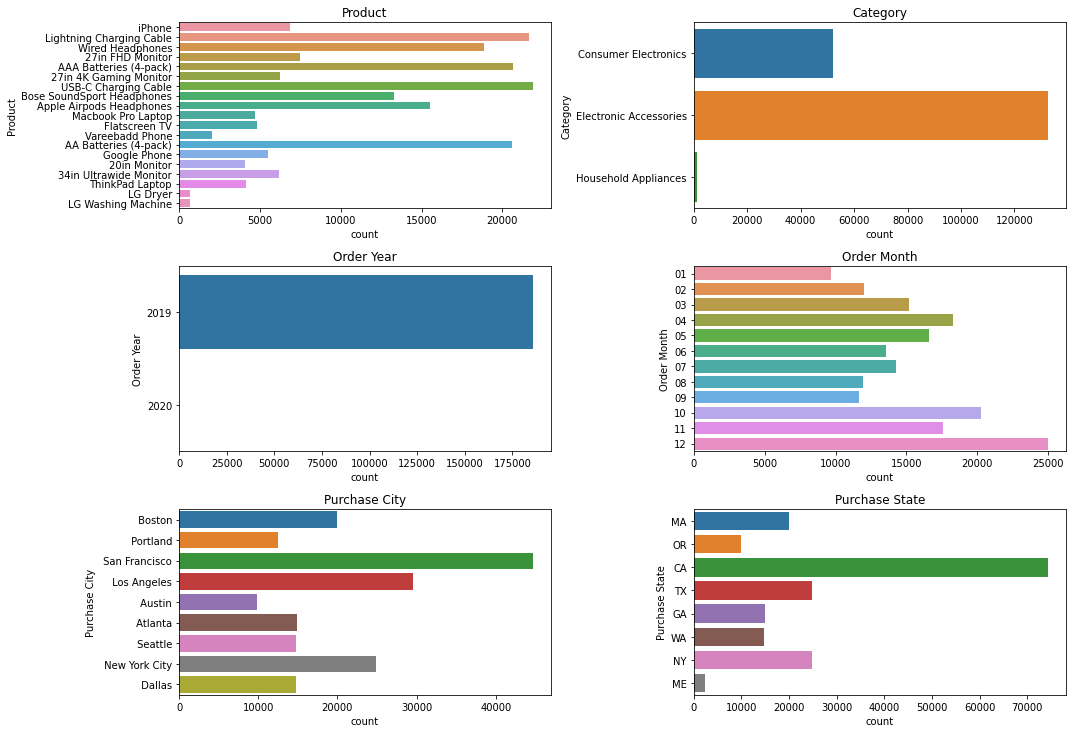

In [77]:
#exploratary data analysis on category features
cat = data.select_dtypes(include='object').columns.tolist()
col = len(cat)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (cat):
    sns.countplot(y=var,data=data,ax=axs[i])
    axs[i].set_title(var)
        
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

# Exploratary Data Analysis

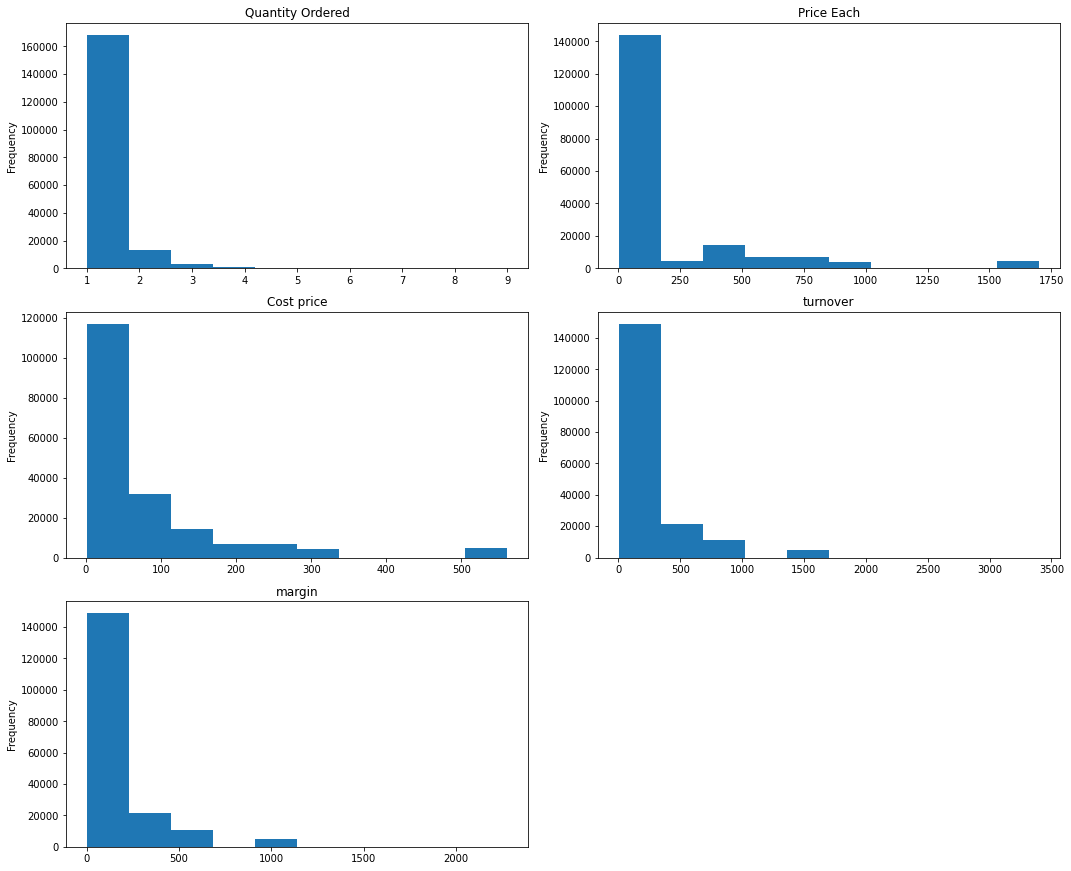

In [78]:
#exploratary data analysis on numerical or continuous features
num = data.select_dtypes(include=['int','float']).columns.tolist()
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (num):
    data[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)
        
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

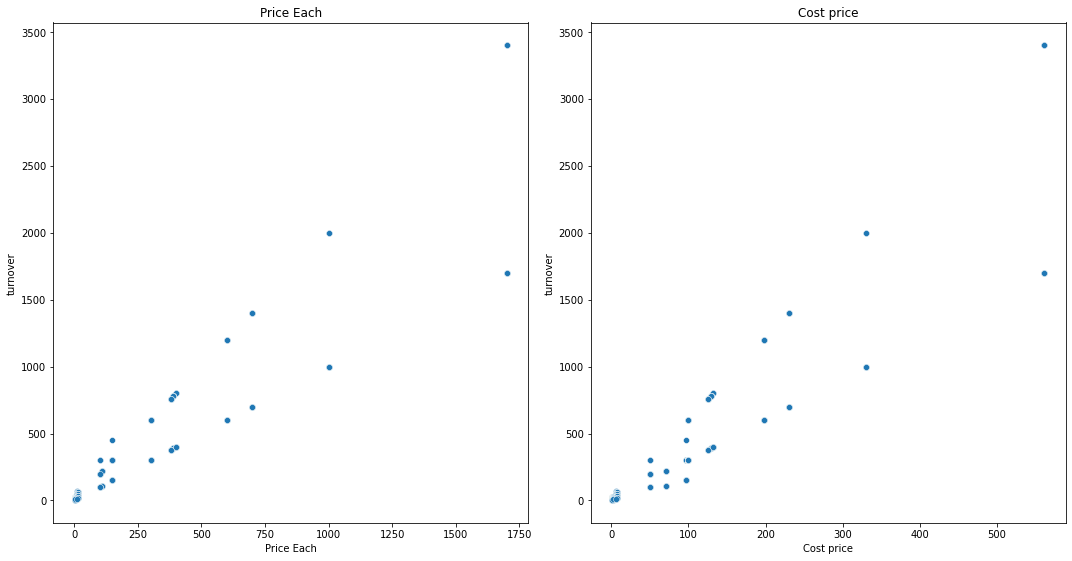

In [79]:
#using scatter plot to tells relation between 2 independent feature
num = ['Price Each','Cost price']
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i , var in enumerate (num):
    sns.scatterplot(x=var,y='turnover',data=data,ax=axs[i])
    axs[i].set_title(var)
        
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

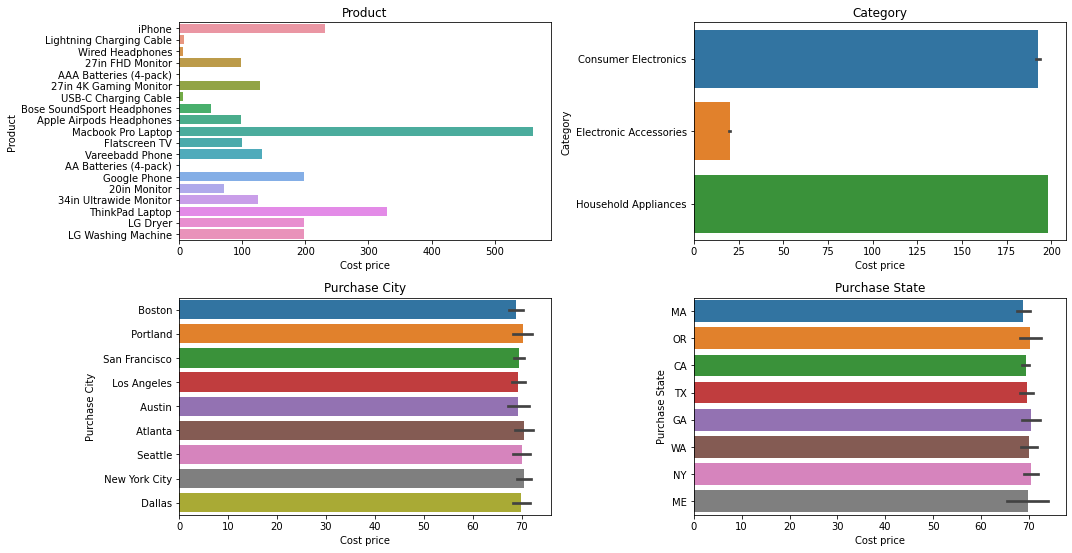

In [80]:
#eda using dependent feature cost price
cat = ['Product','Category','Purchase City','Purchase State']
col = len(cat)
fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (cat):
    sns.barplot(x='Cost price', y=var, data=data, ax=axs[i])
    axs[i].set_title(var)
    
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

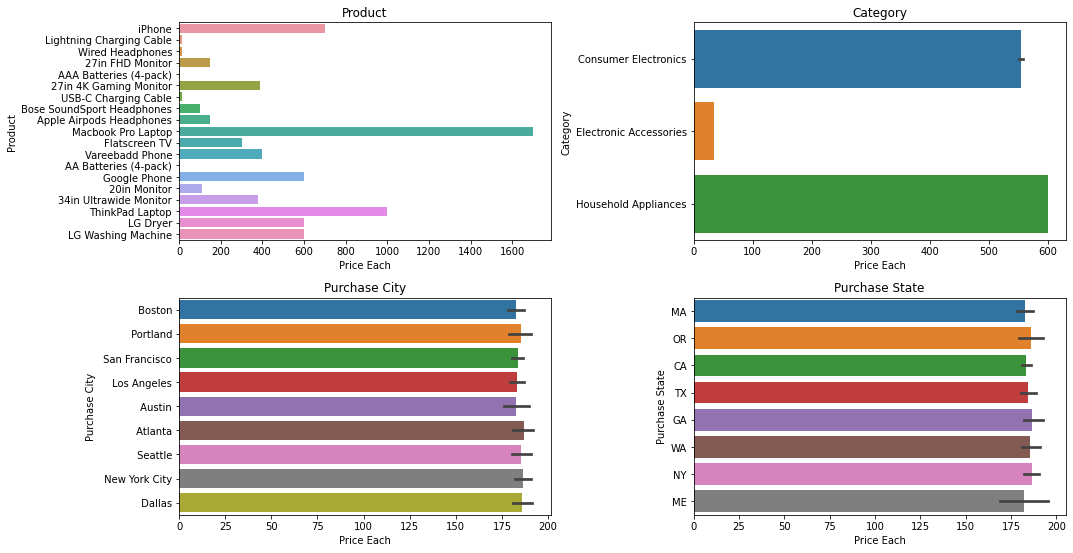

In [81]:
#eda using dependent feature Price Each
cat = ['Product','Category','Purchase City','Purchase State']
col = len(cat)
fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (cat):
    sns.barplot(x='Price Each', y=var, data=data, ax=axs[i])
    axs[i].set_title(var)
    
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

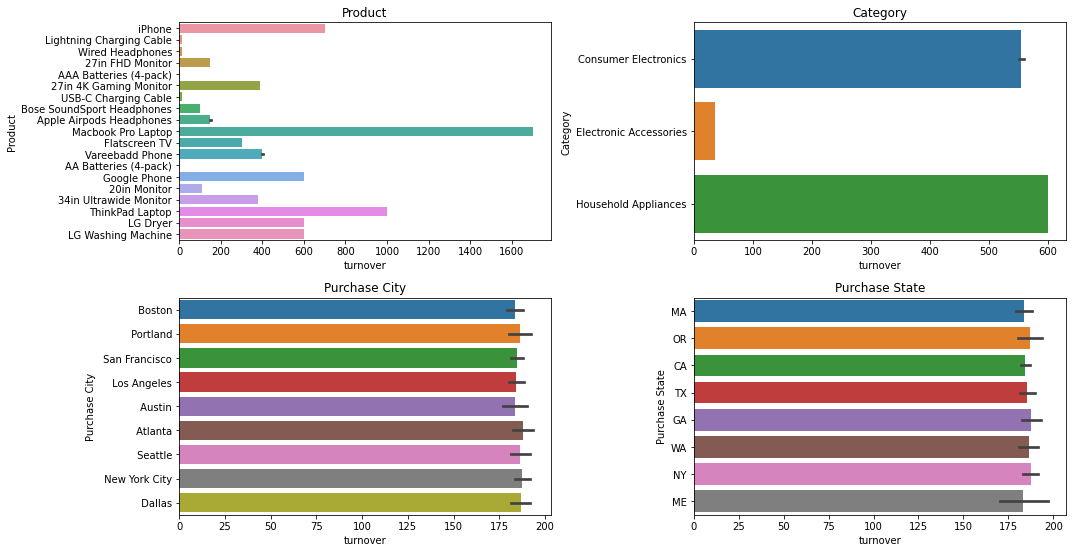

In [83]:
#eda using dependent feature Turnover
cat = ['Product','Category','Purchase City','Purchase State']
col = len(cat)
fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (cat):
    sns.barplot(x='turnover', y=var, data=data, ax=axs[i])
    axs[i].set_title(var)
    
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

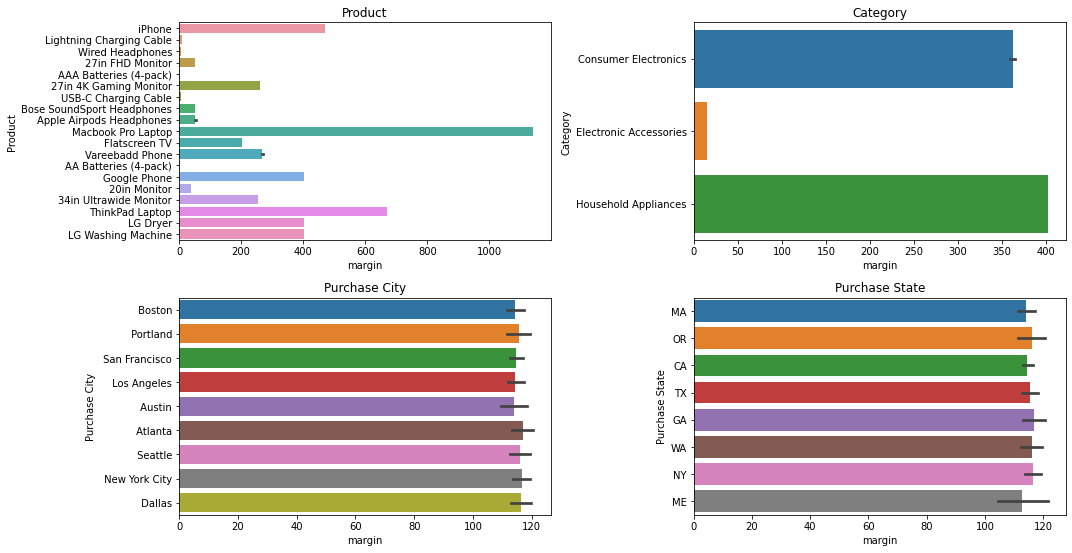

In [84]:
#eda using dependent feature Margin
cat = ['Product','Category','Purchase City','Purchase State']
col = len(cat)
fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (cat):
    sns.barplot(x='margin', y=var, data=data, ax=axs[i])
    axs[i].set_title(var)
    
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

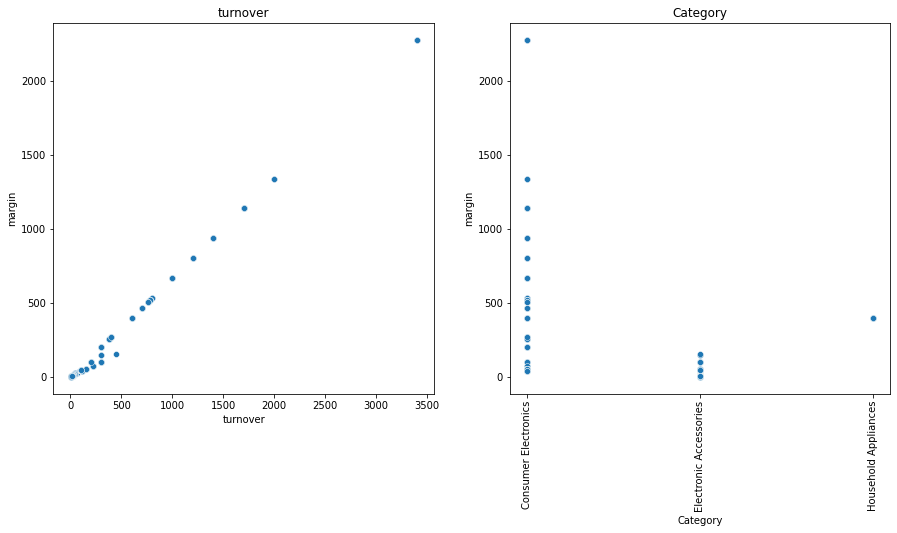

In [93]:
#using scatter plot to tells relation between margin and category or product
num = ['turnover','Category']
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i , var in enumerate (num):
    sns.scatterplot(x=var,y='margin',data=data,ax=axs[i])
    axs[i].set_title(var)
        
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        


plt.xticks(rotation = 90)
plt.show()